# Introduction to Scipy: Interpolation and Integration

In this section, we will look at two other common sub-packages of Scipy: [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html) and [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html).

## Interpolation

The simplest interpolation routine in [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html) is [interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d):

In [1]:
from scipy.interpolate import interp1d

If we create a fake dataset:

In [2]:
import numpy as np
x = np.array([0., 1., 3., 4.])
y = np.array([0., 4., 2.7, 2.08])

we can interpolate linearly by first creating an interpolating function:

In [3]:
f = interp1d(x,y)

and we can then interpolate to any value of x within the original bounds:

In [4]:
f(0.5)

array(2.0)

In [5]:
f(3.3)

array(2.5140000000000002)

It is also possible to interpolate to several values at the same time:

In [6]:
f(np.array([0.5, 1.5, 2.5, 3.5]))

array([ 2.   ,  3.675,  3.025,  2.39 ])

If the interpolating function is called outside the original range, an error is raised:

In [7]:
f(-1.)

ValueError: A value in x_new is below the interpolation range.

You can change this behavior by telling ``interp1d`` to not give an error in this case, but to use a set value:

In [8]:
f = interp1d(x, y, bounds_error=False, fill_value=-10.)

In [9]:
f(-1.0)

array(-10.0)

In [10]:
f(np.array([-1., 1., 3., 6.]))

array([-10. ,   4. ,   2.7, -10. ])

By default, ``interp1d`` uses linear interpolation, but it is also possible to use e.g. cubic **spline** interpolation:

In [11]:
f = interp1d(x, y, kind='cubic')
f(0.5)

array(2.6312499999999996)

Let's compare a few ways to interpolate:

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

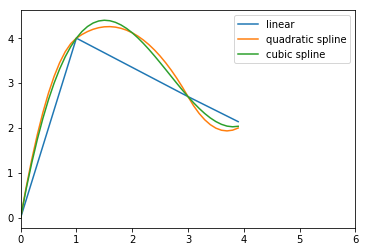

In [13]:
xp=np.arange(0,4,0.1)
f = interp1d(x, y, kind=1)
g = interp1d(x, y,kind=2) # equivalent to 'quadratic'
h = interp1d(x,y,kind=3)  # equivalen to 'cubic'

plt.plot(xp,f(xp),xp,g(xp),xp,h(xp))
plt.xlim(0,6)
plt.legend(['linear','quadratic spline','cubic spline'])

In [14]:
def orig(x):
    return 3.11-3.11*(x-1)*(x-1)+0.5*x+0.39*x*x*x

xp=np.arange(0,4,0.5)
print (xp)
print (orig(xp))
print (h(xp))

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5]
[ 0.       2.63125  4.       4.39875  4.12     3.45625  2.7      2.14375]
[ -4.44089210e-15   2.63125000e+00   4.00000000e+00   4.39875000e+00
   4.12000000e+00   3.45625000e+00   2.70000000e+00   2.14375000e+00]


For more information, see the documentation for [interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d). There are also other interpolation functions available (for example for spline interpolation), which you can read up about at [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html). 

[Wikipedia](https://en.wikipedia.org/wiki/Spline_%28mathematics%29) also has some information on splines.

## Integration

The available integration functions are listed at [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate). See also the tutorial [here](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). You will notice there are two kinds of functions - those that integrate actual Python functions, and those that integrate numerical functions defined by Numpy arrays.

First, we can take a look at one of the functions that can integrate actual Python functions. If we define a function:

In [15]:
def simple_function(x):
    return 3. * x**2 + 2. * x + 1.

we can integrate it between limits using:

In [16]:
from scipy.integrate import quad
print(quad(simple_function, 1., 2.))

(10.999999999999998, 1.221245327087672e-13)


As described in the documentation for [quad](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad), the first value returned is the integral, and the second is the error on the integral. If we had solved the integral analytically, we would expect 11, so the result is correct. The names comes from quadrature for working out the area under curve by splitting it up into known sub-areas.

We can also define functions as Numpy arrays:

In [17]:
x = np.linspace(1., 2., 1000)
y = 3. * x**2 + 2. * x + 1.

And in this case we can use for example the [simps](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) function to integrate using Simpson's rule:

In [18]:
from scipy.integrate import simps
print(simps(y, x=x))

11.0000000005


This can be very useful in cases where one wants to integrate actual data that cannot be represented as a simple function or when the function is only available numerically.

Note that there is an issue on the [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) page - there should also be a menton of the ``trapz`` function which works similarly to ``simps`` but does trapezium integration:

In [19]:
from scipy.integrate import trapz
print(trapz(y, x=x))

11.000000501


## Exercise 1

a) Write a function that takes ``x``, and the parameters for a Gaussian (amplitude, displacement, width) and returns the value of the Gaussian at ``x``:

In [20]:

# your solution here
import numpy as np

def gaussian(x, amp=1., x0=0., sig=1.):
    f = amp*np.exp(-0.5*(x-x0)**2./sig**2.)
    return f

b) Use ``quad`` to compute the integral and compare to what you would expect.

In [21]:

# your solution here
import math
amp = 1.
x0 = 0.
sig = 1.
x1 = 0.
x2 = 2.
numerical = quad(gaussian,x1,x2,args=(amp,x0,sig))
print(numerical)
analytical = amp*np.sqrt(np.pi/2.)*(math.erf(np.sqrt(0.5)*(x2-x0)/sig)-
                                    math.erf(np.sqrt(0.5)*(x1-x0)/sig))
analytical, np.abs(numerical[0]-analytical)

(1.1962880133226081, 1.3281464964738456e-14)


(1.1962880133226079, 2.2204460492503131e-16)

c) Now create two arrays ``x`` and ``y`` that contain the Gaussian for fixed values ``x``, and try and compute the integral using ``simps``.

In [22]:
# your solution here
xp = np.linspace(x1,x2,1000)
y = gaussian(xp,amp,x0,sig)
print(simps(y, x=xp))

1.19628801312


Compare this to what you found with ``quad`` and analytically.

## Differential equations

An important task in scientific computing is to solve differential equations.

*scipy.integrate* also has *odeint* which we use here to solve the damped oscillation

$$\ddot{x} + 2 \gamma \dot{x} + k x = 0$$


In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint

For the *odeint* solver, the differential equation needs to be split up into a system of first-order equations:

(1)    $\dot{x} = v$

(2)    $\dot{v} = -k x - 2 g v$

In [24]:
def diffeq(x, t,k,g):

    #define/clear derivative
    dxdt = np.zeros(2)

    """ differential equation for damped oscillation
        split into first-order equation 
         x. = v
         v. = - k x - 2 gamma v
    """
    dxdt[0] = x[1]
    dxdt[1] = -k*x[0] - 2* g*x[1]

    return dxdt

""" constants """
k=0.1
g=0.025

x    = np.array([2.0,-0.8])         # initial position
time = np.linspace(0.0,100.0,100)   # evaluation times

""" calling the solver """
solution = odeint(diffeq, x, time, args=(k,g))

This is the corresponding analytical solution:

In [25]:
def damped_oscillation(t,x,k,g):
    om=np.sqrt(k-g**2)
    
    A=x[1]/om
    B=x[0]
    
    return (A*np.sin(om*t)+B*np.cos(-om*t))*np.exp(-g*t)

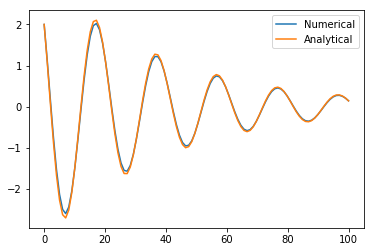

In [26]:

plt.plot(time,solution[:,0],time,damped_oscillation(time,x,k,g))
plt.legend(['Numerical','Analytical'])

## Exercise 2

a) Plot the motion of a critically damped oscillator $\gamma$ = $\sqrt{k}$ 

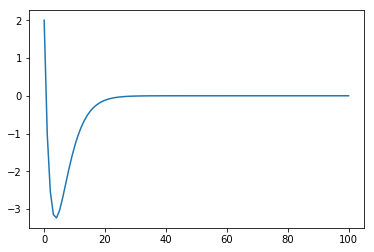

In [27]:

# solution here
from scipy.integrate import odeint

def diffeq(x, t,k,g):

    #define/clear derivative
    dxdt = np.zeros(2)

    """ differential equation for damped oscillation
        split into first-order equation 
         x. = v
         v. = - k x - 2 gamma v
    """
    dxdt[0] = x[1]
    dxdt[1] = -k*x[0] - 2* g*x[1]

    return dxdt

""" constants """
k=0.1
g=np.sqrt(k)

x    = np.array([2.0,-4.])         # initial position
time = np.linspace(0.0,100.0,100)   # evaluation times

""" calling the solver """
solution = odeint(diffeq, x, time, args=(k,g))
plt.plot(time,solution[:,0])

b) Extend the differential equation by a forcing $f(t)=A_0 \cos (\omega_0 t)$ [choose $A_0$ and $\omega_0$].
Consider the initial behaviour of the system.

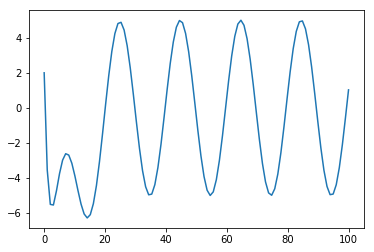

In [28]:
# solution here
def diffeq(x, t,k,g,a0,omega0):

    #define/clear derivative
    dxdt = np.zeros(2)

    """ differential equation for damped oscillation
        split into first-order equation 
         x. = v
         v. = - k x - 2 gamma v
    """
    dxdt[0] = x[1]
    dxdt[1] = -k*x[0] - 2* g*x[1] + a0*np.cos(omega0*t)

    return dxdt

""" constants """
k=0.1
g=np.sqrt(k)
a0=1.
omega0=np.sqrt(k)

x    = np.array([2.0,-8.])         # initial position
time = np.linspace(0.0,100.0,100)   # evaluation times

""" calling the solver """
solution = odeint(diffeq, x, time, args=(k,g,a0,omega0))
plt.plot(time,solution[:,0])

Interactive solution by Oskar Weinfurtner
-----------------------------------------

Differential equation with forcing:   $$\ddot{x} + 2 \gamma \dot{x} + k x - A_0 \cos (\omega_0 t) = 0$$

In [29]:
# Import Modules
%matplotlib inline
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [30]:
# Define the Differential Equation with forcing
def diffeq(x,t,k,g,A,w):
    #define/clear derivative
    dxdt = np.zeros(2)

    """ differential equation with forcing
        split into first-order equation 
         x. = v
         v. = - k x - 2 gamma v - A * cos (omega * t)
    """
    dxdt[0] = x[1]
    dxdt[1] = -k*x[0] - 2* g*x[1]-A*np.cos(w*t)

    return dxdt

In [31]:
# Define function that takes parameters and creates plot
def differential(k=0.1,g=2.5,A=3.2,w=5.5,x=2.,v=-0.8):
    x    = np.array([x,v])         # initial position
    time = np.linspace(0.0,100.0,500)   # evaluation times
    solution = odeint(diffeq, x, time, args=(k,g/100,A,w))
    plt.plot(time,solution[:,0])
    plt.ylim(-5,5) #this can be removed for dynamic adaption to size
    plt.show()

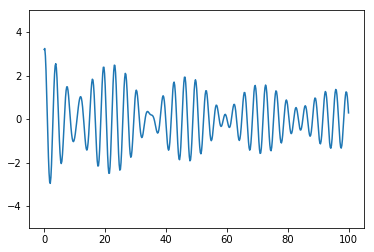

In [32]:
# Call interactive with function and initial parameters
w = interactive(differential, g=(1., 12.), k=(0.,5.), A=(-10.,10.), w=(0.0,7.0), x=(-4.,4.), v=(-4., 4))
display(w)

# The Parameters are: 
# k = k
# g = gamma (multiplied by 100 because widget only supports 2 decimal places)
# A = amplitude of forcing 
# w = frequqency of forcing
# x = initial position
# v = initial velocity

# Example of nice beat (Schwebung): 2.70, 1.90, 0.90, 1.90, 3.20, 1.20
# Have fun poking around and exploring!